In [0]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [0]:
env = gym.make("Taxi-v3")
action_num = env.action_space.n
obs_num = env.observation_space.n

In [0]:
# Learning Parameters
episodes_num = 50000
learning_rate = 0.1
max_steps = 299
discount = 0.92
epsilon = 1.0
epsilon_min = 0.1
epsilon_max = 1.0
decay_rate = 0.001

In [0]:
q_table = np.zeros((obs_num, action_num))

In [0]:
def greedy(eps):
  pivot = random.uniform(0, 1)
  return pivot > eps

In [6]:
%%time

rewards = []
steps_till_success = []

for episode in range(episodes_num):
  state = env.reset()
  reward = 0
  step = 0
  done = False
  cumul_rewards = 0

  for step in range(max_steps):
    # env.render()

    # Choose an action
    if greedy(epsilon):
      action = np.argmax(q_table[state,:])
    else:
      action = env.action_space.sample()

    # Perform it
    new_state, reward, done, _ = env.step(action)

    # Update q-table
    q_table[state, action] = q_table[state, action] + learning_rate * (reward + 
                  discount * np.max(q_table[new_state, :]) - q_table[state, action])
    state = new_state

    cumul_rewards += reward

    if done == True:
      steps_till_success.append(step + 1)
      rewards.append(cumul_rewards)
      break

  # env.render()
  epsilon = epsilon_min + (epsilon_max - epsilon_min)*np.exp(-decay_rate * episode) 
  if episode % 10000 == 0:
    learning_rate = learning_rate / 2
  # print("**********************************************************************")

env.close()
print(f'Average reward:{sum(rewards)/episodes_num}')
print(f'Min step to success: {min(steps_till_success)}')

Average reward:-9.28614
Min step to success: 6
CPU times: user 21.6 s, sys: 17.1 ms, total: 21.7 s
Wall time: 21.7 s


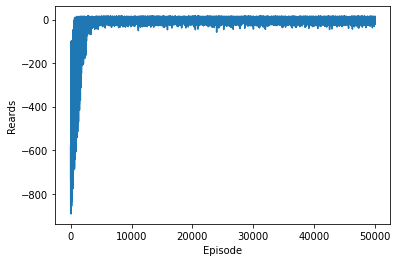

In [10]:
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.show()

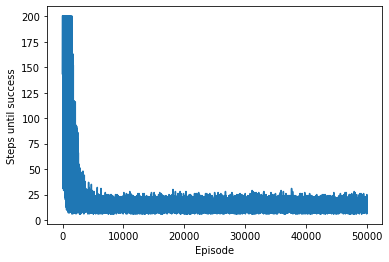

In [11]:
plt.plot(steps_till_success)
plt.xlabel('Episode')
plt.ylabel('Steps until success')
plt.show()

In [0]:
print(q_table)

In [12]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):

        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            env.render()
            print("Number of steps", step)
            break
        state = new_state
env.close()

****************************************************
EPISODE  0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Number of steps 13
****************************************************
EPISODE  1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Number of steps 17
****************************************************
EPISODE  2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Number of steps 8
****************************************************
EPISODE  3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Number of steps 15
****************************************************
EPISODE  4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Number of steps 15


In [14]:
rewards_test = []
steps = []

for episode in range(1000):
    state = env.reset()
    total_reward = 0
    step = 0
    done = False

    for step in range(max_steps):
        
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)

        total_reward += reward
        
        if done:
          rewards_test.append(total_rewards)
          steps.append(step + 1)
          break
        state = new_state

env.close()

print(f'Average reward: {total_reward}')
print(f'Average steps: {np.mean(steps)}')
print(np.var(rewards))

Average reward: 11
Average steps: 13.081
5891.936183900398


In [0]:
df1 = pd.DataFrame()
df1['steps'] = steps_till_success
df1.to_csv('Q_tab_Taxi_50000_steps.csv')
files.download(r'Q_tab_Taxi_50000_steps.csv')

df2 = pd.DataFrame()
df2['rewards'] = rewards
df2.to_csv('Q_tab_Taxi_50000_rewards.csv')
files.download(r'Q_tab_Taxi_50000_rewards.csv')